# PCA Lab II

In [1]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
import numpy as np
import math
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans
from sklearn import metrics

%matplotlib inline

## Step 1: Setup the Data

After you've downloaded the data from the repository, go ahead and load it with Pandas

In [5]:
airports = pd.read_csv('./../../assets/datasets/airport_operations.csv')

In [6]:
airports.head()

,airport,year,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay
0,ABQ,2004,53971,53818,0.8030,0.7809,0.7921,10.38,9.89,2.43,12.10,2.46,0.83,2.55,10.87
1,ABQ,2005,51829,51877,0.8140,0.7922,0.8001,9.60,9.79,2.29,11.20,2.26,0.89,2.34,10.24
2,ABQ,2006,49682,51199,0.7983,0.7756,0.7746,10.84,9.89,2.16,12.33,2.12,0.84,2.66,11.82
3,ABQ,2007,53255,53611,0.8005,0.7704,0.7647,11.29,10.34,2.40,12.95,2.19,1.29,3.06,12.71
4,ABQ,2008,49589,49512,0.8103,0.7844,0.7875,10.79,10.41,2.41,12.32,1.82,1.03,2.79,11.48


## Step 2: Explore the Data

Next - Let's plot! You can use any plotting library of your choice, but be sure to explore all of the data.

In [7]:
import seaborn as sns

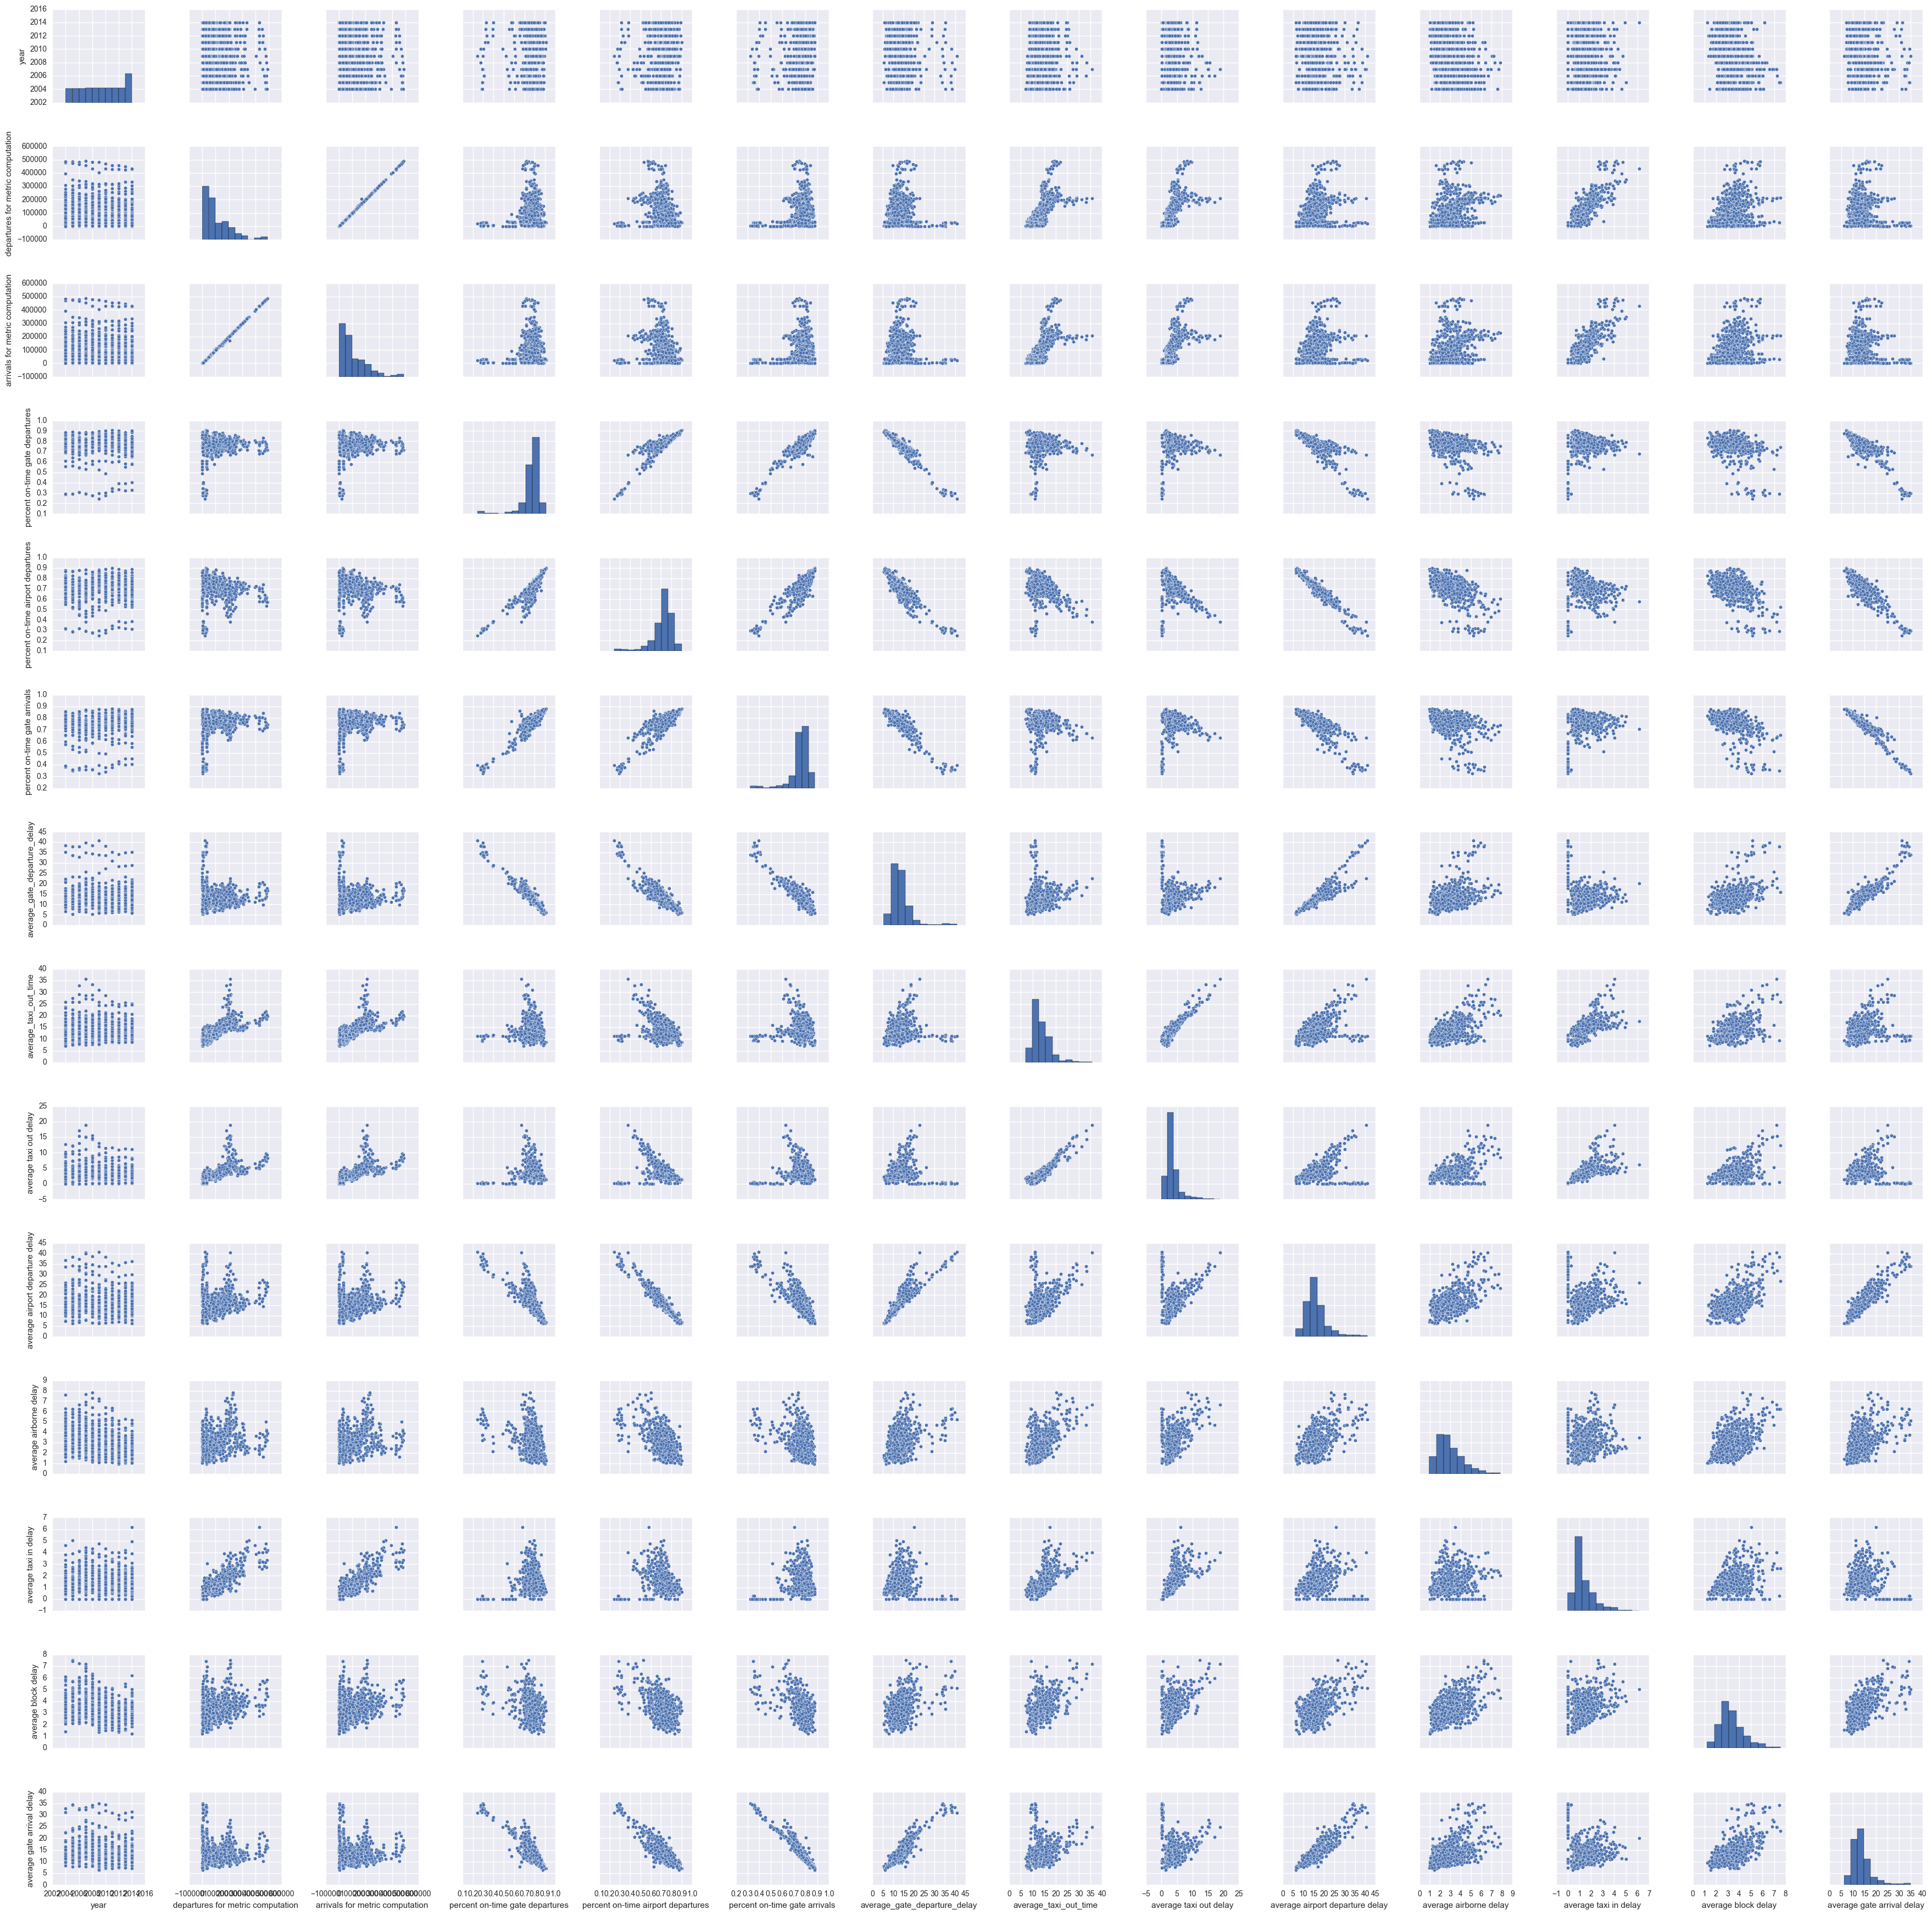

In [12]:
sns.pairplot(airports)

## Step 3: Define the Variables

Next, let's define the x and y variables: Airport is going to be our "x" variable

In [16]:
x = airports.drop(['airport', 'year'], axis=1)
y = airports.airport

## Step 4: Covariance Matrix

Then, standardize the x variable for analysis

In [24]:
x_stand = StandardScaler().fit_transform(x)

In [25]:
x_stand

array([[-0.55269892, -0.55179125,  0.41670953, ..., -0.58849731,
        -0.76079377, -0.70168278],
       [-0.57450712, -0.57162597,  0.53460207, ..., -0.52044906,
        -0.9654201 , -0.84232194],
       [-0.59636622, -0.57855433,  0.36633727, ..., -0.57715593,
        -0.65360855, -0.48960786],
       ..., 
       [-1.05379873, -1.05283011, -3.99997364, ..., -1.52983138,
         0.49619655,  3.2161224 ],
       [-1.04012533, -1.03874858, -3.98389739, ..., -1.52983138,
        -0.41000577,  3.07548324],
       [-1.02672683, -1.02436048, -3.88743986, ..., -1.52983138,
         0.5449171 ,  3.33890262]])

Next, create the covariance matrix from the standardized x-values and decompose these values to find the eigenvalues and eigenvectors

In [26]:
cov_mat = np.cov(x_stand.T)

In [29]:
eigenValues, eigenVectors = np.linalg.eig(cov_mat)

# Step 5: Eigenpairs

Then, check your eigenvalues and eigenvectors:

In [31]:
print eigenValues
eigenVectors

[  6.43554591e+00   4.30034272e+00   8.46168848e-01   5.11389160e-01
   4.68106591e-01   1.67784858e-01   1.20373902e-01   8.75752619e-02
   6.42089840e-02   1.02498362e-02   2.85997229e-03   1.66983552e-04
   7.03167500e-04]


array([[  1.15534165e-01,  -4.14065994e-01,  -3.99975407e-01,
         -1.44386242e-01,   1.88812357e-01,  -2.89427568e-01,
          5.58777294e-02,  -8.74632562e-02,   3.56070223e-02,
          2.10712103e-02,  -1.29886455e-02,  -7.07882813e-01,
         -3.47029233e-02],
       [  1.15117360e-01,  -4.13745773e-01,  -4.01992814e-01,
         -1.46930754e-01,   1.86961849e-01,  -2.90096332e-01,
          6.01701522e-02,  -1.00170466e-01,   3.50827364e-02,
          3.13868217e-02,   1.01203490e-02,   7.04169491e-01,
          3.79124127e-02],
       [ -3.16692368e-01,  -2.50781656e-01,   2.54173262e-01,
          1.26763507e-01,   7.27315049e-03,  -6.41665658e-02,
          3.29583557e-01,   2.19208711e-02,   3.30107052e-01,
          1.46329054e-01,  -6.79379109e-01,   2.14540200e-02,
         -2.24646995e-01],
       [ -3.76648424e-01,  -7.51268241e-02,   9.06533172e-02,
          1.18107796e-01,   2.02346218e-01,  -4.71651244e-02,
          3.84319806e-01,   2.70677467e-01,   2.477

To find the principal componants, find the eigenpairs, and sort them from highest to lowest. 

In [32]:
eigenPairs = [(np.abs(eigenValues[i]), eigenVectors[:,i]) for i in range(len(eigenValues))]
eigenPairs.sort()
eigenPairs.reverse()
for i in eigenPairs:
    print(i[0])

6.43554590921
4.30034271686
0.84616884844
0.511389159623
0.468106590922
0.167784858101
0.120373901809
0.0875752619392
0.0642089840261
0.0102498362064
0.002859972289
0.000703167500326
0.000166983552113


## Step 6: Explained Variance

Now, calculate the explained variance and the Cumulative explained variance

In [35]:
totalEigen = sum(eigenValues)
varExp = [(i / totalEigen)*100 for i in sorted(eigenValues, reverse=True)]
cumulvarExp = np.cumsum(varExp)

In [36]:
cumulvarExp

array([  49.44533581,   82.48556156,   88.98681312,   92.91589841,
         96.51243674,   97.80155483,   98.72640691,   99.39926175,
         99.89258972,   99.97134086,   99.99331449,   99.99871704,  100.        ])

** What does the explained variance tell us?**: Here, we can see that 81.77% of the behavior can be explained by the first two principal components

## Step 7: Perform the PCA

Instead of creating the projection matrix, we're going to use Scikit's built in function. Now that we have discovered the principal componants, we have an educated idea on how many componants to pass to the function. 

In [153]:
airports_pca = PCA(n_components=2)
Y = airports_pca.fit_transform(x_stand)

In [149]:
np.cumsum(airports_pca.explained_variance_ratio_)

array([ 0.49445336,  0.82485562,  0.88986813,  0.92915898,  0.96512437])

Create a dataframe from the PCA results

In [158]:
df = pd.DataFrame(Y, columns = ['pc1', 'pc2'])
# df = pd.DataFrame(comp.T)

In [131]:
df.head()

,pc1,pc2
0,-2.104891,0.769690
1,-2.501786,0.700678
2,-1.947183,0.990674
3,-1.512762,0.725494
4,-2.061681,0.748124


Now, create a new dataframe that uses the airport and year from the original set and join the PCA results with it to form a new set

In [160]:
df['airport'] = airports.airport
df['year'] = airports.year

df.head()

,pc1,pc2,airport,year
0,-2.104891,0.769690,ABQ,2004
1,-2.501786,0.700678,ABQ,2005
2,-1.947183,0.990674,ABQ,2006
3,-1.512762,0.725494,ABQ,2007
4,-2.061681,0.748124,ABQ,2008


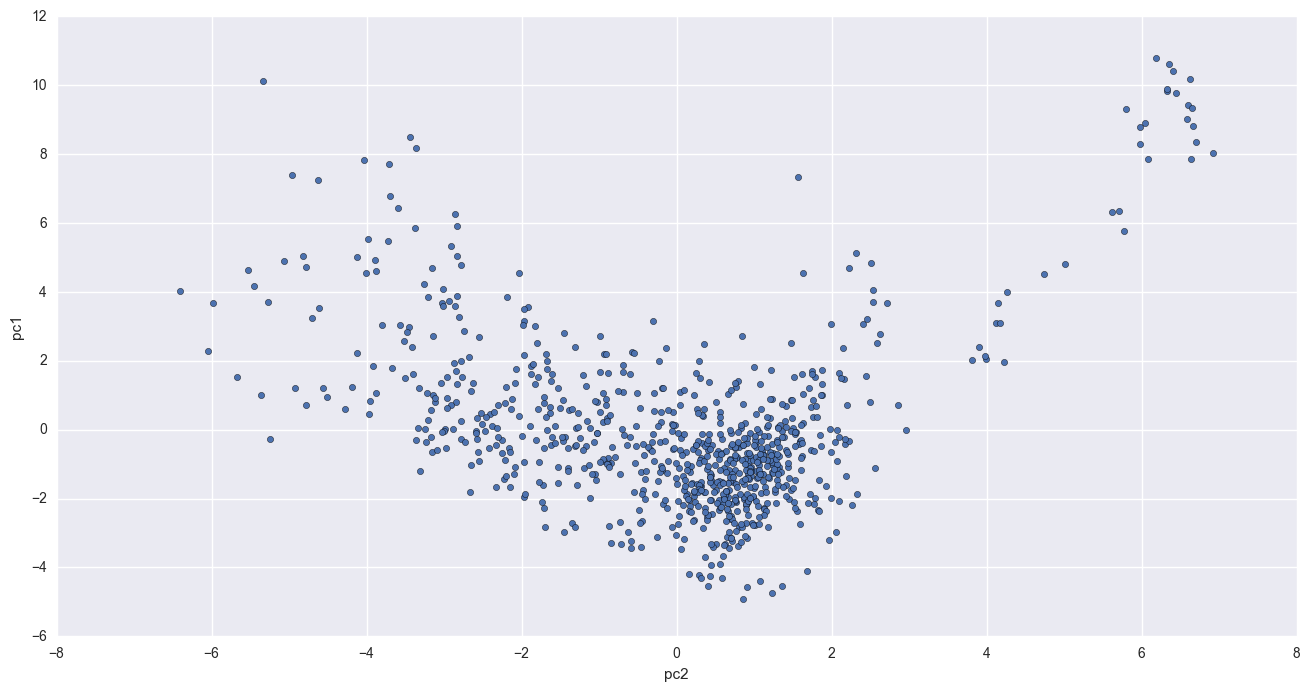

In [170]:
df.plot(kind='scatter', x='pc2', y='pc1', figsize=(16,8))

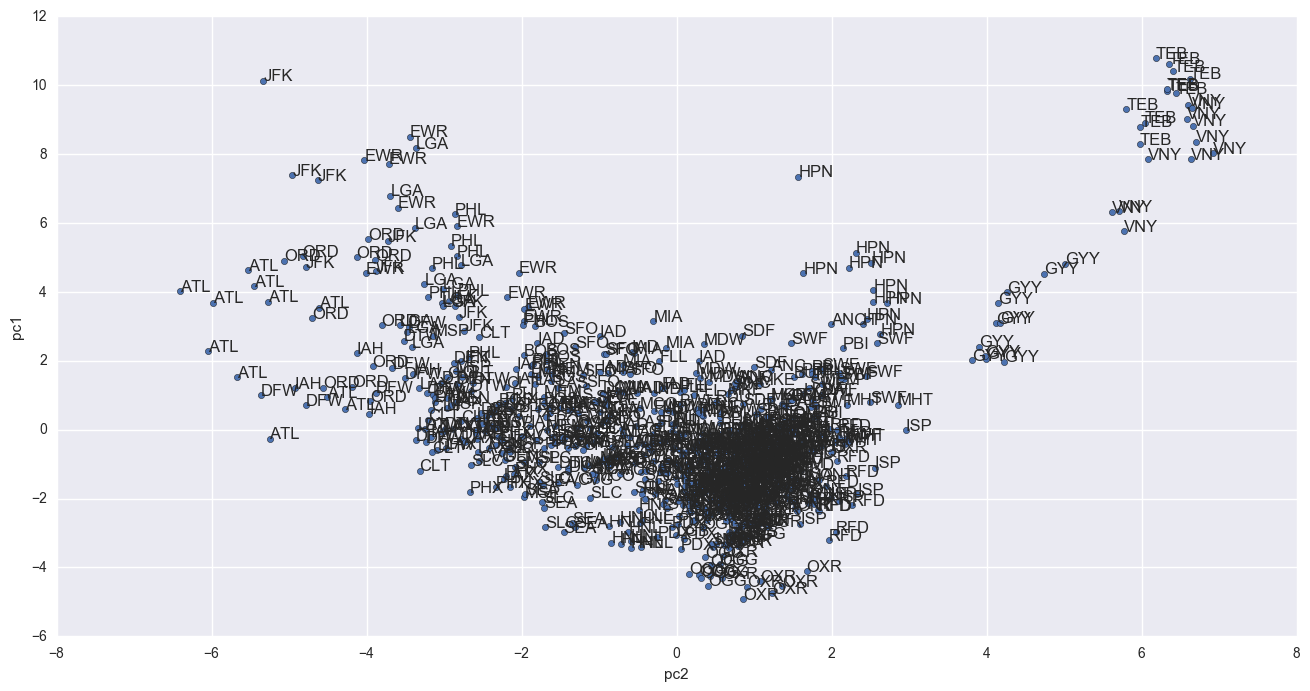

In [161]:
graph = df.plot(kind='scatter', x='pc2', y='pc1', figsize=(16,8))

for i, airport in enumerate(airports['airport']):
    graph.annotate(airport, (df.iloc[i].pc2, df.iloc[i].pc1))

Next, graph the results onto the new feature space

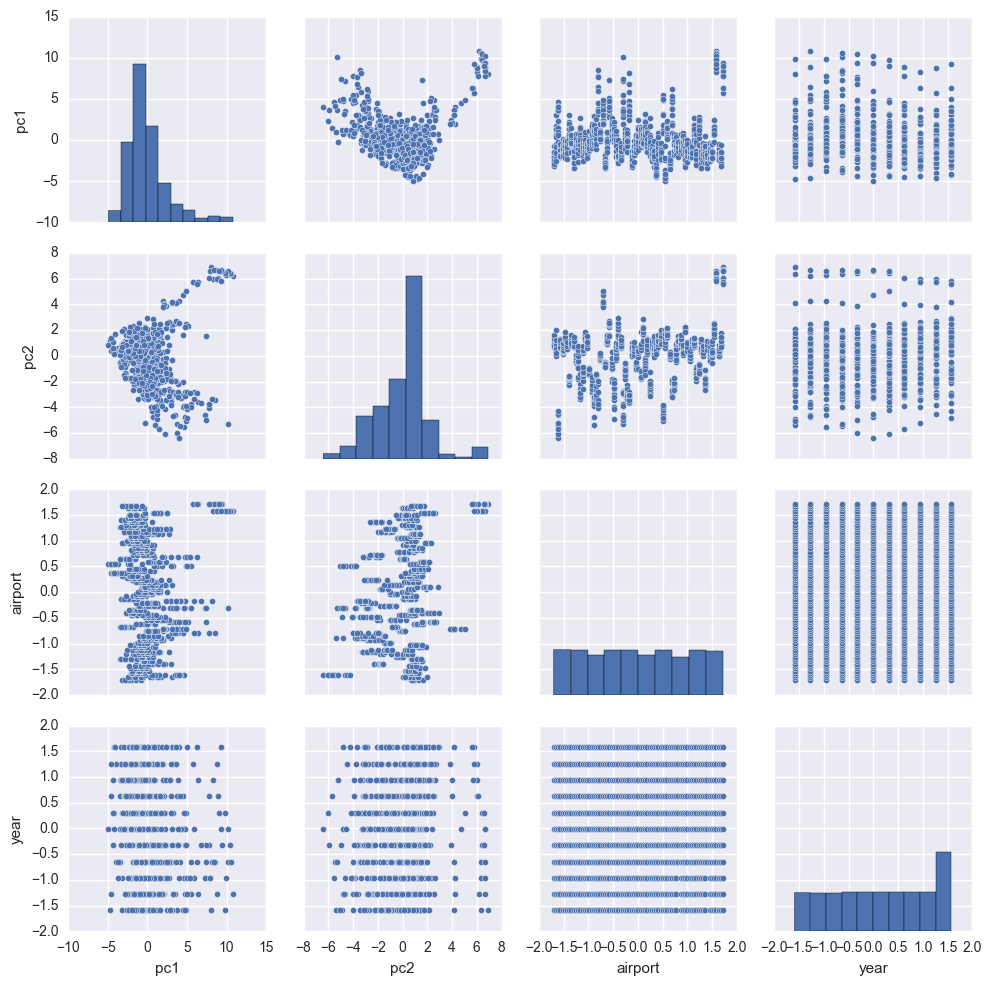

In [136]:
sns.pairplot(df)

**What does the graph tell us?**

## Step 8: Cluster with K-Means

Set up the k-means clustering analysis. Use the graph from above to derive "k"

In [162]:
X= df[['pc1','pc2']]

In [164]:
from sklearn import cluster
k = 2
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Compute the labels and centroids

In [165]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

Compute the Silhoutte Score

In [172]:
metrics.silhouette_score(X,labels, metric='euclidean')

0.52432332867947096

Lastly, plot the new two-dimensional data along with their cluster assignments: 

In [167]:
df['label'] = labels

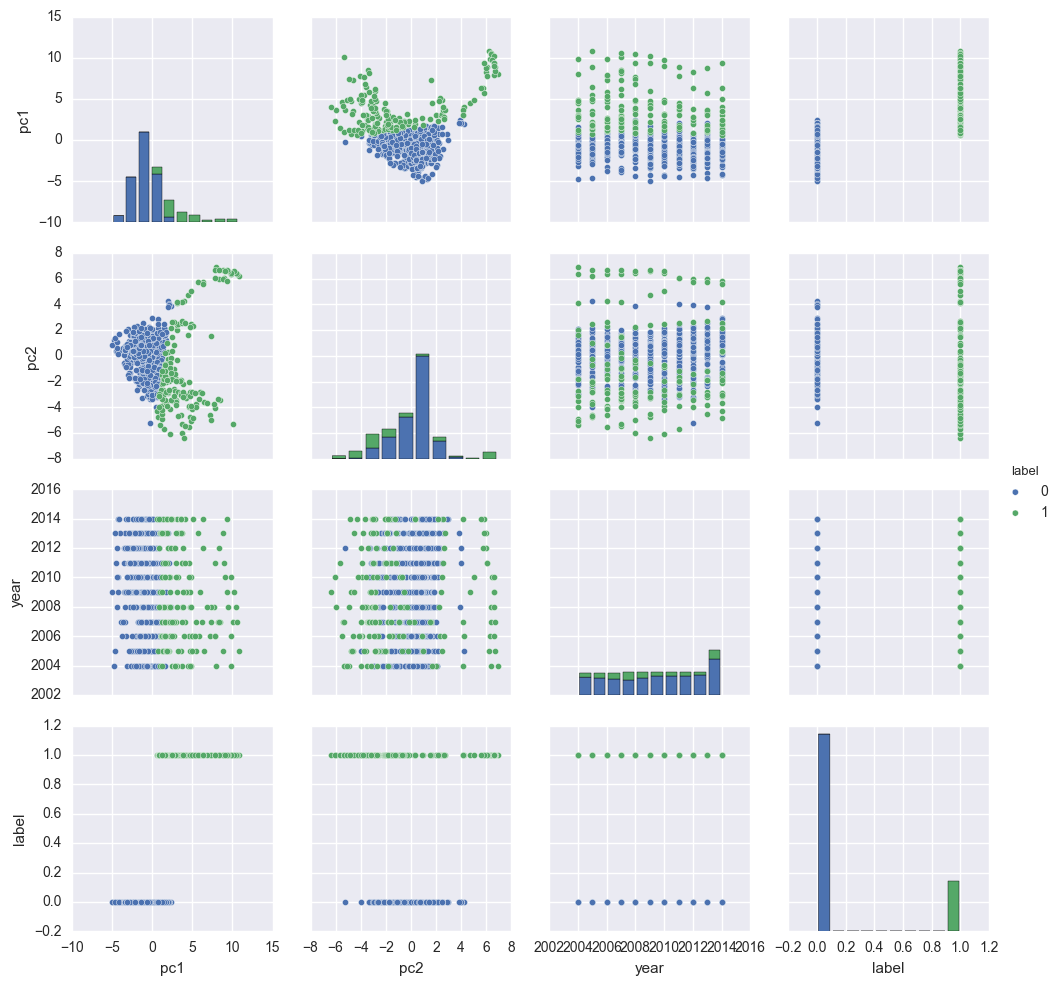

In [168]:
sns.pairplot(df, hue='label')
plt.show()